In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt 
import seaborn as sns
import requests
import csv
import seaborn as sns

In [4]:
# Get data from source
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
link_names = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.names"
df = pd.read_csv(link, header=None)

f = requests.get(link_names)
df_names = f.text

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
# Sorting data inte cat (Y), data (X) and tp (description)
cat = df[17]
data = df.iloc[:,1:17]
tp = df[0]

In [7]:
# Translating legs into dummies - For final modeling data 
legs = pd.get_dummies(df[13]).rename(columns=lambda x: 'legs_' + str(x))
df1 = pd.concat([data.drop(13,axis=1),legs], axis=1)

In [8]:
df1.head()

,1,2,3,4,5,6,7,8,9,10,...,12,14,15,16,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,1,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0


In [9]:
##### ##### #####
#####  PCA  #####
##### ##### #####
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df1)

PCA(n_components=2)

In [10]:
print("Components are the following:")
print(pca.components_)
print("Explained variance:")
print(pca.explained_variance_)

Components are the following:
[[ 0.39152128 -0.17501554 -0.41209985  0.42420029 -0.18429373 -0.17346115
  -0.00627062  0.31954873  0.14934143  0.15170727 -0.04305721 -0.06091615
   0.09742841  0.05380785  0.27941453 -0.1164673  -0.12806392  0.3489102
  -0.01018567 -0.08258485 -0.01160846]
 [-0.12065543 -0.27048009  0.02160039 -0.03606955 -0.32970995  0.37807854
   0.29068064  0.29648862  0.02325062 -0.35015263  0.04462457  0.32640781
   0.00306506 -0.08571179  0.04106193  0.3748333  -0.31704396 -0.00590458
   0.00821023 -0.06756227  0.00746727]]
Explained variance:
[1.21901473 0.74003376]


In [11]:
pca_data = pca.fit_transform(df1)

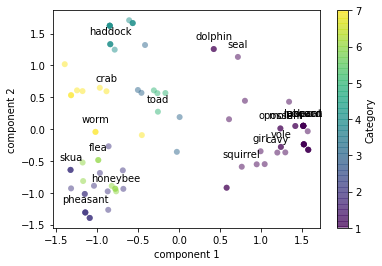

In [12]:
plt.scatter(pca_data[:, 0], pca_data[:, 1],
            c=cat, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label="Category");
i=0
for x,y in zip(pca_data[:,0],pca_data[:,1]):
    
    label = tp[i]
    i=i+1
    
    k=5
    if i/k==round(i/k):
        plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
#plt.savefig("PCA.png")

In [13]:
##### ##### #####
#####  MDS  #####
##### ##### #####

Feature ranking:
1. feature 3 (0.134323)
2. feature 1 (0.103528)
3. feature 2 (0.094029)
4. feature 0 (0.077414)
5. feature 7 (0.070355)
6. feature 9 (0.065740)
7. feature 8 (0.065413)
8. feature 16 (0.064084)
9. feature 11 (0.056398)
10. feature 5 (0.042463)
11. feature 15 (0.042351)
12. feature 17 (0.040348)
13. feature 19 (0.035089)
14. feature 4 (0.031738)
15. feature 12 (0.026976)
16. feature 14 (0.018592)
17. feature 10 (0.012997)
18. feature 6 (0.012516)
19. feature 20 (0.003897)
20. feature 13 (0.001386)
21. feature 18 (0.000364)


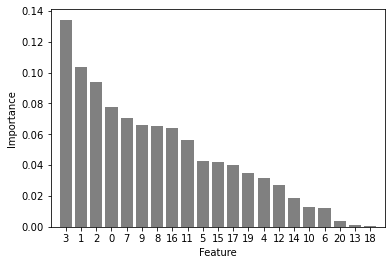

In [32]:
# Variable importance using a Random forest with type as y
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
RF.fit(df1, cat)
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(df1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.bar(range(df1.shape[1]), importances[indices],
        color="grey", align="center")
plt.xticks(range(df1.shape[1]), indices)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xlim([-1, df1.shape[1]])
plt.savefig("varimportance.png")

In [40]:
# Adjusting data for variable importance
df_mds = df1
df_mds.iloc[:,3]= df1.iloc[:,3]*3
df_mds.iloc[:,1]= df1.iloc[:,1]*3
df_mds.iloc[:,2]= df1.iloc[:,2]*3
df_mds.iloc[:,0]= df1.iloc[:,0]*2
df_mds.iloc[:,7]= df1.iloc[:,7]*2
df_mds.iloc[:,9]= df1.iloc[:,9]*2
df_mds.iloc[:,8]= df1.iloc[:,8]*2
df_mds.iloc[:,16]= df1.iloc[:,16]*2
df_mds.iloc[:,11]= df1.iloc[:,11]*2
df_mds.iloc[:,5]= df1.iloc[:,5]*2

In [41]:
# Choice of distance metric and calculation of distance matrix

# OBS: To get original data, change the below data to "df1"

# Manhattan distance
from sklearn.metrics.pairwise import manhattan_distances
D = manhattan_distances(df_mds, df_mds)

# Euclidean distance
from sklearn.metrics.pairwise import euclidean_distances
D_euc = euclidean_distances(df_mds, df_mds)

In [56]:
# Calculating the Gram matrix from data and from distance matrix D through double centering trick
S = -(1/2)*((D.T - D.mean(axis=1)).T -  D.mean(axis=0)+ D.mean().mean())
S_euc = -(1/2)*((D_euc.T - D_euc.mean(axis=1)).T -  D_euc.mean(axis=0)+ D_euc.mean().mean())

# OBS: To get original data, change the below data to "df1"
S_cos = np.dot(df_mds,df_mds.T)

In [53]:
# SVD decomposition of S
U, s, V = np.linalg.svd(S)

U_euc, s_euc, V_euc = np.linalg.svd(S_euc)

U_cos, s_cos, V_cos = np.linalg.svd(S_cos)

In [57]:
S_cos.shape

(101, 101)

In [58]:
# Selecting number of components
components = 2
I = np.diag(np.concatenate((np.ones(components),np.zeros(df_mds.shape[0]-components))))
# Square root of diagonal matrix
s_sqrt = np.diag(np.sqrt(s))
s_cos_sqrt = np.diag(np.sqrt(s_cos))
s_euc_sqrt = np.diag(np.sqrt(s_euc))

# New data
Y_man = np.dot(np.dot(I,s_sqrt),U.T).T
Y_cos = np.dot(np.dot(I,s_cos_sqrt),U_cos.T).T
Y_euc = np.dot(np.dot(I,s_euc_sqrt),U_euc.T).T

ValueError: shapes (101,101) and (21,21) not aligned: 101 (dim 1) != 21 (dim 0)

In [ ]:
### OBS: In the below, plots have been generated separately with and without feature importance adjustment

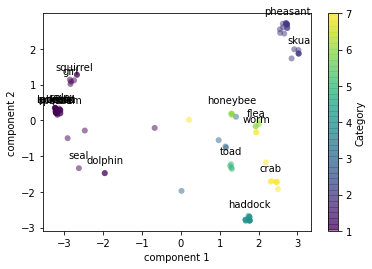

In [47]:
# Plot new data
plt.scatter(Y_man[:,0], Y_man[:, 1],
            c=cat, edgecolor='none', alpha=0.5)
l = 0.5
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label="Category");
i=0
for x,y in zip(Y_man[:,0],Y_man[:,1]):
    
    label = tp[i]
    i=i+1
    
    k=5
    if i/k==round(i/k):
        plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.savefig("MDS_man_vi.png")

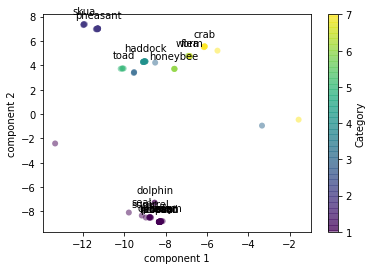

In [48]:
# Plot new data
plt.scatter(Y_cos[:,0], Y_cos[:, 1],
            c=cat, edgecolor='none', alpha=0.5)
l = 0.5
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label="Category");
i=0
for x,y in zip(Y_cos[:,0],Y_cos[:,1]):
    
    label = tp[i]
    i=i+1
    
    k=5
    if i/k==round(i/k):
        plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.savefig("MDS_cos_vi.png")

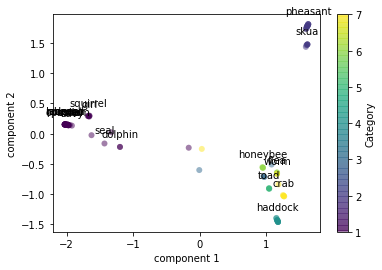

In [49]:
# Plot new data
plt.scatter(Y_euc[:,0], Y_euc[:, 1],
            c=cat, edgecolor='none', alpha=0.5)
l = 0.5
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label="Category");
i=0
for x,y in zip(Y_euc[:,0],Y_euc[:,1]):
    
    label = tp[i]
    i=i+1
    
    k=5
    if i/k==round(i/k):
        plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.savefig("MDS_euc_vi.png")

In [578]:
##### ##### ######
##### ISOMAP #####
##### ##### ######

In [579]:
from sklearn.neighbors import NearestNeighbors

In [604]:
# Finding p nearest neighbors according to distance metric
p = 30
dis_metric= 'euclidean'

nbrs = NearestNeighbors(n_neighbors=p, algorithm='brute',metric=dis_metric).fit(df1)
distances, indices = nbrs.kneighbors(df1)

In [605]:
# Creating neighbor graph matrix, let all distances be 99999(INF) except nearest neighbors which get exact distances
D_graph = np.ones([df1.shape[0],df1.shape[0]])*99999
for i in range(indices.shape[0]-1):
    for j in range(indices.shape[1]-1):
        D_graph[i,indices[i,j]]= distances[i,j]

In [606]:
# Function for Floyd Warshall Algorithm
def FW(graph_matrix): 
    d =graph_matrix
    n = d.shape[0]
    for k in range(n):
        for i in range(n):
            for j in range(n): 
                d[i][j] = min(d[i][j] ,d[i][k]+ d[k][j])
    return d

In [607]:
D_FW = FW(D_graph) 

In [608]:
# Now, we compute MDS using D_FW as distance matrix

# Double centering to get Similarity
S = -(1/2)*((D_FW.T - D_FW.mean(axis=1)).T -  D_FW.mean(axis=0)+ D_FW.mean().mean())

# SVD decomposition
U, s, V = np.linalg.svd(S)

# Selecting number of components
components = 2
I = np.diag(np.concatenate((np.ones(components),np.zeros(df1.shape[0]-components))))

# Square root of diagonal matrix
s_sqrt = np.diag(np.sqrt(s))

# New data
Y_ISO = np.dot(np.dot(I,s_sqrt),U.T).T

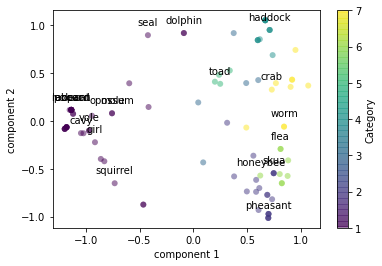

In [609]:
# Plot ISOMAP
plt.scatter(Y_ISO[:,0], Y_ISO[:, 1],
            c=cat, edgecolor='none', alpha=0.5)
l = 0.5
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label= "Category");
i=0
for x,y in zip(Y_ISO[:,0],Y_ISO[:,1]):
    
    label = tp[i]
    i=i+1
    
    k=5
    if i/k==round(i/k):
        plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.savefig("ISO_30.png")

In [81]:
df[df[17]==6]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
24,flea,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
30,gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
39,honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6
40,housefly,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
42,ladybird,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0,6
51,moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
88,termite,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
